In [35]:
import pandas as pd 
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')
df.sample(10)

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
306,25,25,42,59.52,2,0,v New Zealand,Mumbai,22/10/2017,ODI # 3928
180,19*,19,40,47.5,2,0,v Netherlands,Delhi,09/03/2011,ODI # 3124
269,27,27,29,93.1,3,0,v South Africa,Mumbai,25/10/2015,ODI # 3700
233,51*,51,40,127.5,3,4,v West Indies,Visakhapatnam,24/11/2013,ODI # 3437
267,47,47,61,77.04,5,0,v South Africa,Rajkot,18/10/2015,ODI # 3695
307,18*,18,21,85.71,3,0,v New Zealand,Pune,25/10/2017,ODI # 3931
18,11,11,16,68.75,1,0,v New Zealand,Harare,06/09/2005,ODI # 2281
211,113*,113,125,90.4,7,3,v Pakistan,Chennai,30/12/2012,ODI # 3314
298,67*,67,86,77.9,4,1,v Sri Lanka,Pallekele,27/08/2017,ODI # 3907
199,58*,58,69,84.05,3,1,v Sri Lanka,Adelaide,14/02/2012,ODI # 3239


In [37]:
df.isna().sum()

score          0
runs_scored    0
balls_faced    0
strike_rate    0
fours          0
sixes          0
opposition     0
ground         0
date           0
odi_number     0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   score        350 non-null    object
 1   runs_scored  350 non-null    object
 2   balls_faced  350 non-null    object
 3   strike_rate  350 non-null    object
 4   fours        350 non-null    object
 5   sixes        350 non-null    object
 6   opposition   350 non-null    object
 7   ground       350 non-null    object
 8   date         350 non-null    object
 9   odi_number   350 non-null    object
dtypes: object(10)
memory usage: 27.5+ KB


In [39]:
a = pd.DataFrame(np.ones(shape=(len(df),1),dtype=int))
a
oppo = df[['opposition']]
oppo['play'] = a
oppo =oppo.groupby('opposition').sum()
oppo

C:\Users\ankus\AppData\Local\Temp\ipykernel_12924\1360955793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oppo['play'] = a


,play
opposition,
v Afghanistan,2
v Africa XI,3
v Australia,55
v Bangladesh,21
v Bermuda,1
v England,48
v Hong Kong,2
v Ireland,2
v Netherlands,1


In [40]:
oppo.sort_values(inplace=True,by='play',ascending=False)

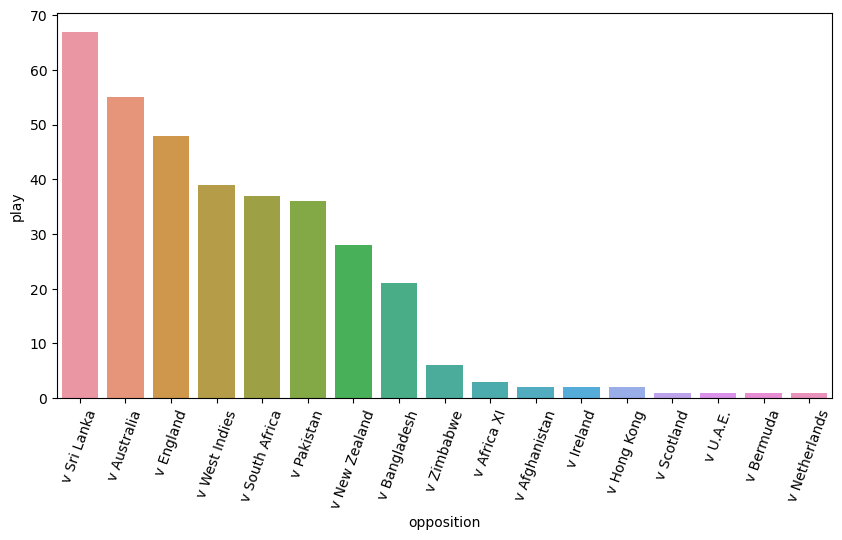

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(data=oppo,x=oppo.index,y=oppo['play'])
plt.xticks(rotation=70);

In [42]:
rs = df[['opposition']]
rs['runs'] = df['runs_scored']
rs['runs'].replace({'-':0},inplace=True) # replcae non digit str with zero
rs['runs'] = rs['runs'].astype(int) # convert to int
rs = rs.groupby('opposition').sum()
rs.sort_values('runs',ascending=False,inplace=True)
rs

C:\Users\ankus\AppData\Local\Temp\ipykernel_12924\2279843796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs['runs'] = df['runs_scored']
C:\Users\ankus\AppData\Local\Temp\ipykernel_12924\2279843796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs['runs'].replace({'-':0},inplace=True) # replcae non digit str with zero
C:\Users\ankus\AppData\Local\Temp\ipykernel_12924\2279843796.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,runs
opposition,
v Sri Lanka,2383
v Australia,1660
v England,1546
v Pakistan,1231
v West Indies,1005
v New Zealand,940
v South Africa,830
v Bangladesh,569
v Zimbabwe,208


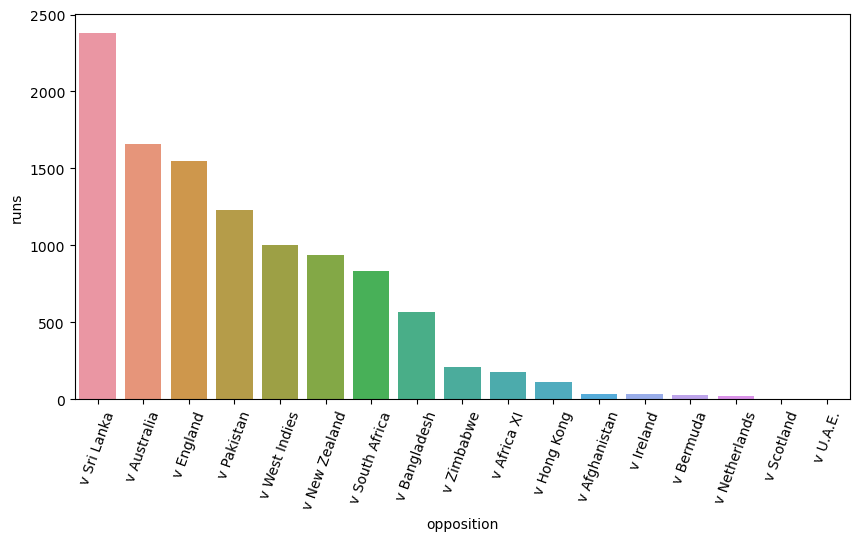

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(data=rs,x=rs.index,y=rs['runs'])
plt.xticks(rotation=70);

In [44]:
onavg = rs
onavg['runs'] = rs['runs'] / oppo['play']
onavg 

,runs
opposition,
v Sri Lanka,35.567164
v Australia,30.181818
v England,32.208333
v Pakistan,34.194444
v West Indies,25.769231
v New Zealand,33.571429
v South Africa,22.432432
v Bangladesh,27.095238
v Zimbabwe,34.666667


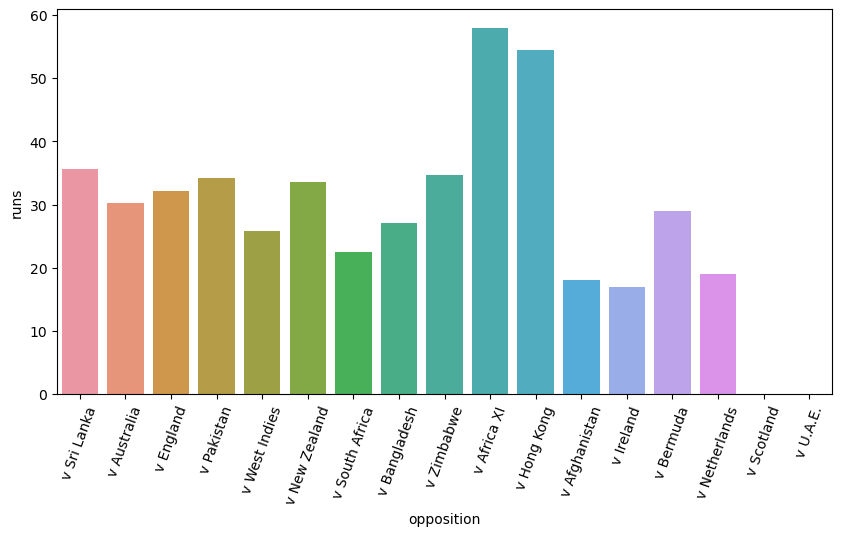

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(data=onavg ,x=onavg .index,y=onavg ['runs'])
plt.xticks(rotation=70);

In [46]:
BvR = df[['opposition','balls_faced','runs_scored']]
BvR['balls_faced'].replace({'-':0},inplace=True)
BvR['balls_faced'] = BvR['balls_faced'].astype(int)
BvR['runs_scored'] .replace({'-':0},inplace=True)
BvR['runs_scored'] = BvR['runs_scored'].astype(int)
BvR = BvR.groupby('opposition').sum()
BvR

C:\Users\ankus\AppData\Local\Temp\ipykernel_12924\1066295341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BvR['balls_faced'].replace({'-':0},inplace=True)
C:\Users\ankus\AppData\Local\Temp\ipykernel_12924\1066295341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BvR['balls_faced'] = BvR['balls_faced'].astype(int)
C:\Users\ankus\AppData\Local\Temp\ipykernel_12924\1066295341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,balls_faced,runs_scored
opposition,,
v Afghanistan,69,36
v Africa XI,139,174
v Australia,2052,1660
v Bangladesh,682,569
v Bermuda,25,29
v England,1758,1546
v Hong Kong,99,109
v Ireland,50,34
v Netherlands,40,19


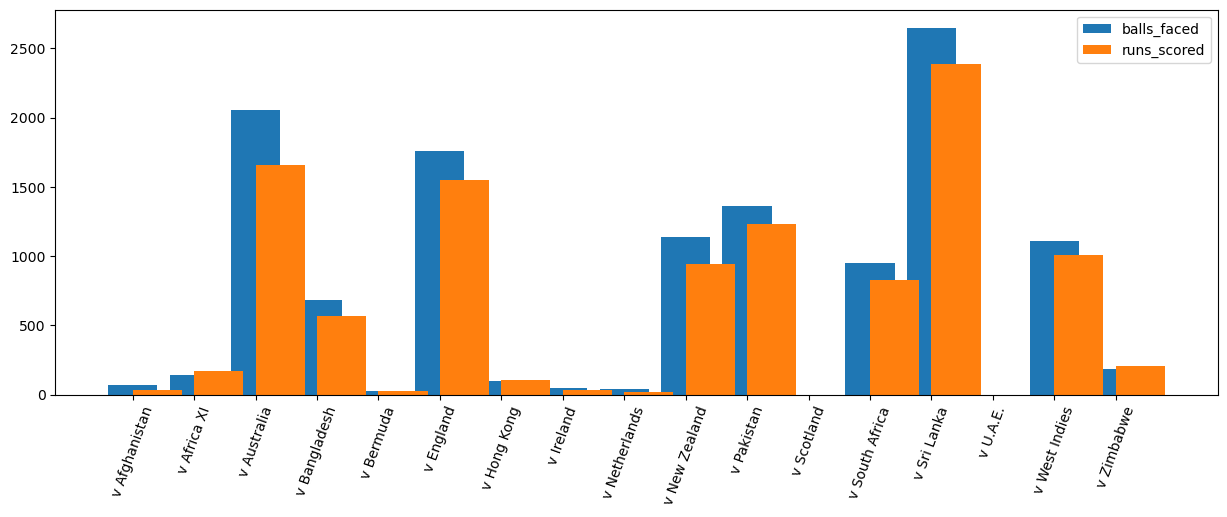

In [47]:
plt.figure(figsize=(15,5))
plt.bar(x=BvR.index,height=BvR['balls_faced'],align='center')
plt.bar(x=BvR.index,height=BvR['runs_scored'],align='edge')
plt.legend(BvR)
plt.xticks(rotation=70);

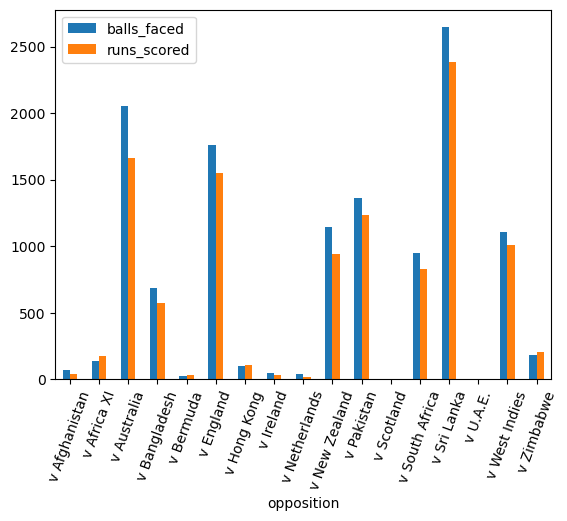

In [48]:
BvR.plot.bar()
plt.legend(BvR)
plt.xticks(rotation=70);

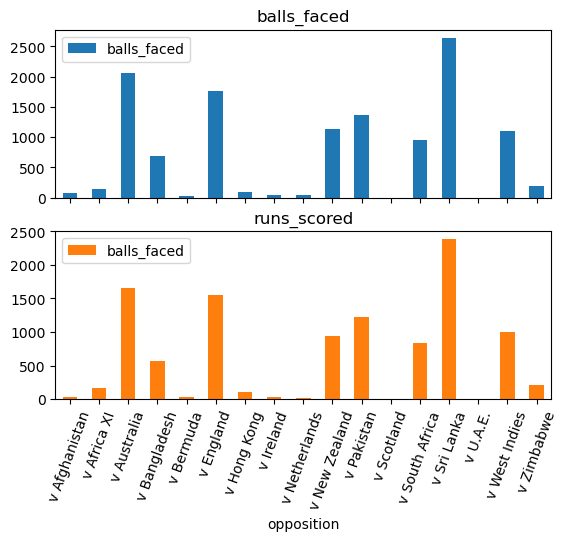

In [49]:
BvR.plot.bar(subplots=True)
plt.legend(BvR)
plt.xticks(rotation=70);

1. crate a DF runs_scored_by_opposition
2. crate a DF not_outs_by_opposition
3. crate a DF innings_by_opposition
4. mearge all

In [50]:
df.head(20)

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
5,28,28,24,116.66,5,0,v Pakistan,Jamshedpur,09/04/2005,ODI # 2237
6,47,47,64,73.43,4,1,v Pakistan,Ahmedabad,12/04/2005,ODI # 2238
7,11,11,16,68.75,1,0,v Pakistan,Kanpur,15/04/2005,ODI # 2239
8,24,24,38,63.15,2,0,v Pakistan,Delhi,17/04/2005,ODI # 2240
9,2,2,7,28.57,0,0,v Sri Lanka,Dambulla,30/07/2005,ODI # 2262


In [51]:
matches = df['score']
matches = matches.apply(lambda x:x.rstrip('*'))
matches.sample(20)

325       8
331     DNB
202     DNB
296     DNB
154      37
263      47
2         7
78       21
148      26
205       4
143    TDNB
182      22
174       5
64       67
337       1
196      29
261      65
284     134
17       67
200      56
Name: score, dtype: object

In [52]:
Mplayed = []
for i in matches:
    if i == 'DNB' or i == 'TDNB':
        Mplayed.append(0)
    else:
        Mplayed.append(1)
Mplayed = pd.DataFrame({'Mathces_Played':Mplayed})
df['Mplayed'] = Mplayed

In [53]:
df.sample(20)

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,Mplayed
75,14*,14,11,127.27,2,0,v South Africa,Belfast,01/07/2007,ODI # 2595,1
278,21,21,24,87.5,1,1,v New Zealand,Dharamsala,16/10/2016,ODI # 3796,1
152,107,107,111,96.39,8,2,v Sri Lanka,Nagpur,18/12/2009,ODI # 2933,1
141,56,56,62,90.32,3,0,v Sri Lanka,Colombo (RPS),14/09/2009,ODI # 2889,1
13,7,7,11,63.63,0,0,v Sri Lanka,Colombo (RPS),09/08/2005,ODI # 2268,1
65,DNB,-,-,-,-,-,v Sri Lanka,Visakhapatnam,17/02/2007,ODI # 2525,0
234,23*,23,23,100,3,0,v West Indies,Kanpur,27/11/2013,ODI # 3439,1
54,28,28,23,121.73,2,0,v Australia,Mohali,29/10/2006,ODI # 2440,1
20,DNB,-,-,-,-,-,v Sri Lanka,Mohali,28/10/2005,ODI # 2287,0
71,2,2,4,50,0,0,v Africa XI,Bengaluru,06/06/2007,ODI # 2587,1


In [54]:
df.replace({'-':'0'},inplace=True)

In [55]:
#df.replace({'DNB':'0','-':'0','TDNB':'0'},inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   score        350 non-null    object
 1   runs_scored  350 non-null    object
 2   balls_faced  350 non-null    object
 3   strike_rate  350 non-null    object
 4   fours        350 non-null    object
 5   sixes        350 non-null    object
 6   opposition   350 non-null    object
 7   ground       350 non-null    object
 8   date         350 non-null    object
 9   odi_number   350 non-null    object
 10  Mplayed      350 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 30.2+ KB


In [57]:
new_df = df[['opposition','score','runs_scored','balls_faced','strike_rate','fours','sixes','Mplayed']]
new_df

,opposition,score,runs_scored,balls_faced,strike_rate,fours,sixes,Mplayed
0,v Bangladesh,0,0,1,0,0,0,1
1,v Bangladesh,12,12,11,109.09,2,0,1
2,v Bangladesh,7*,7,2,350,0,1,1
3,v Pakistan,3,3,7,42.85,0,0,1
4,v Pakistan,148,148,123,120.32,15,4,1
...,...,...,...,...,...,...,...,...
345,v West Indies,56*,56,61,91.8,3,2,1
346,v England,42*,42,31,135.48,4,1,1
347,v Bangladesh,35,35,33,106.06,4,0,1
348,v Sri Lanka,DNB,0,0,0,0,0,0


In [58]:

new_df['runs_scored'] = new_df['runs_scored'].astype(int)
new_df['balls_faced'] = new_df['balls_faced'].astype(int)
new_df['strike_rate'] = new_df['strike_rate'].astype(float)
new_df['fours'] = new_df['fours'].astype(int)
new_df['sixes'] = new_df['sixes'].astype(int)


C:\Users\ankus\AppData\Local\Temp\ipykernel_12924\4226858875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['runs_scored'] = new_df['runs_scored'].astype(int)
C:\Users\ankus\AppData\Local\Temp\ipykernel_12924\4226858875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['balls_faced'] = new_df['balls_faced'].astype(int)
C:\Users\ankus\AppData\Local\Temp\ipykernel_12924\4226858875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [59]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   opposition   350 non-null    object 
 1   score        350 non-null    object 
 2   runs_scored  350 non-null    int32  
 3   balls_faced  350 non-null    int32  
 4   strike_rate  350 non-null    float64
 5   fours        350 non-null    int32  
 6   sixes        350 non-null    int32  
 7   Mplayed      350 non-null    int64  
dtypes: float64(1), int32(4), int64(1), object(2)
memory usage: 16.5+ KB


In [63]:
new_df.head(10)
new_df['opposition'] = new_df['opposition'].apply(lambda x:x.lstrip('v'))

C:\Users\ankus\AppData\Local\Temp\ipykernel_12924\2666281419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['opposition'] = new_df['opposition'].apply(lambda x:x.lstrip('v'))


0      False
1      False
2      False
3       True
4       True
       ...  
345     True
346     True
347    False
348     True
349     True
Name: opposition, Length: 350, dtype: bool

In [64]:
runs_avg = new_df.groupby('opposition').sum()
runs_avg = runs_avg[['runs_scored','Mplayed']]
runs_avg['runs_avg'] = runs_avg['runs_scored'] / runs_avg['Mplayed'] 
runs_avg.replace({np.nan:0},inplace=True)
runs_avg

C:\Users\ankus\AppData\Local\Temp\ipykernel_12924\3705811502.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  runs_avg = new_df.groupby('opposition').sum()


,runs_scored,Mplayed,runs_avg
opposition,,,
Afghanistan,36,2,18.000000
Africa XI,174,3,58.000000
Australia,1660,48,34.583333
Bangladesh,569,17,33.470588
Bermuda,29,1,29.000000
England,1546,44,35.136364
Hong Kong,109,2,54.500000
Ireland,34,1,34.000000
Netherlands,19,1,19.000000


In [79]:
cond = runs_avg.index.str.contains('Australia|England|New Zealand|Pakistan|South Africa|Sri Lanka|West Indies')
runs_avg1 = runs_avg[cond]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


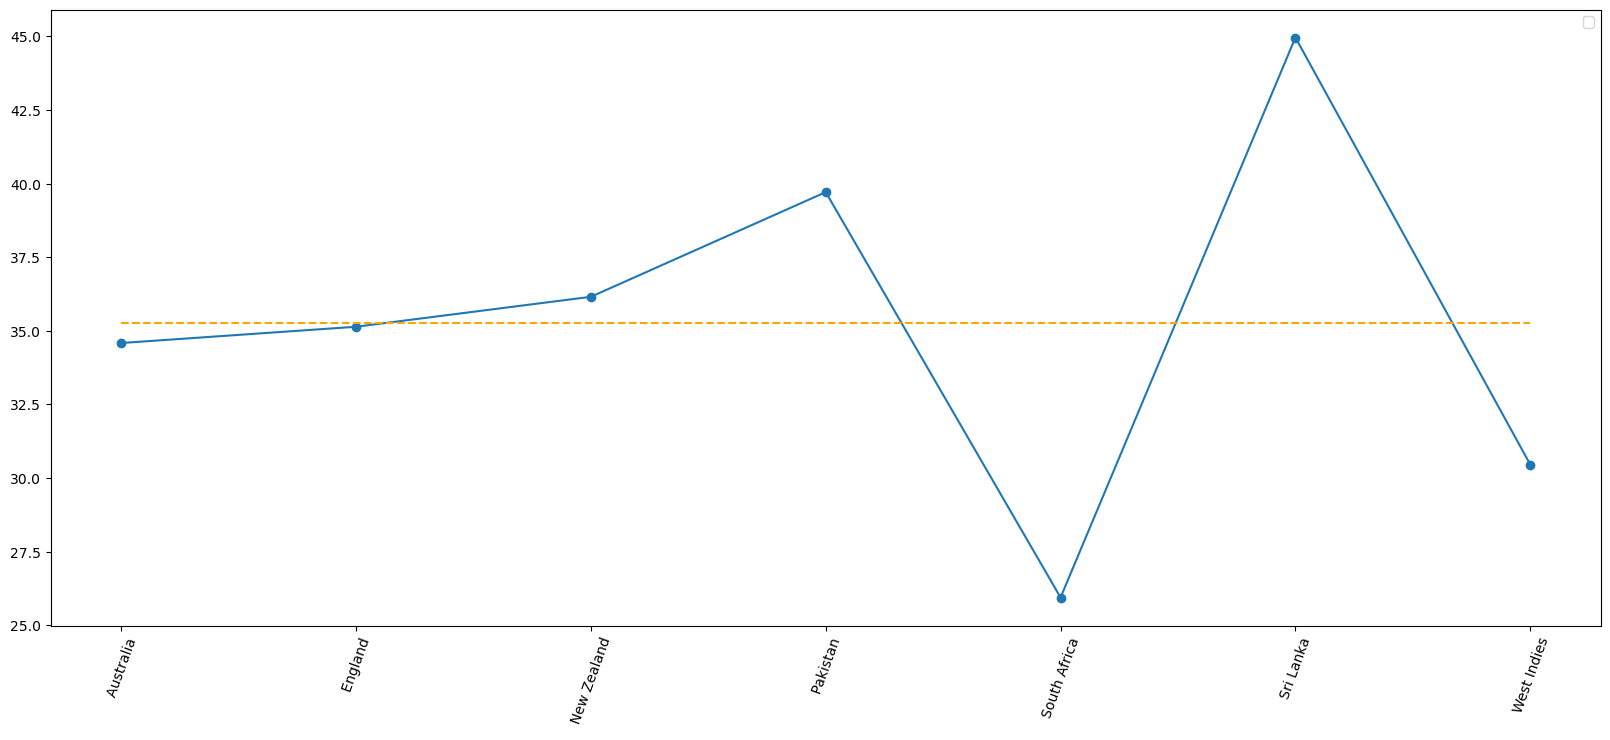

In [85]:
plt.figure(figsize=(20,8))
plt.plot(runs_avg1[['runs_avg']],marker='o')
plt.plot([runs_avg1[['runs_avg']].mean()]*len(runs_avg1),'--',color='orange');
plt.legend()
plt.xticks(rotation=70);